In [40]:
from utils.experiment_utils import get_all_experiments_info, load_best_model
import torch
import os
import hydra
from omegaconf import DictConfig, OmegaConf

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import dirichlet, pearsonr

from matplotlib import rcParams

from itertools import product

rcParams['figure.dpi'] = 300

In [37]:
def simplex_grid(dim, points_per_dim):
    lin = np.linspace(0, 1, points_per_dim)
    grid = np.array(list(product(*([lin] * dim))))
    grid = grid[np.isclose(grid.sum(axis=1), 1)]  # keep only rows that sum to 1
    return grid

def prepare_dataset(dataset_cfg, num_probs, set_size=100):
    # probs = simplex_grid(dataset_cfg['data_shape'][0], num_probs)
    dataset = hydra.utils.instantiate(dataset_cfg)
    dataset.probs = dataset.probs[:num_probs]
    dataset.data = dataset.sample(dataset.probs, dataset.n_per_multinomial, 
                                  dataset.probs.shape[0], set_size, [dataset.probs.shape[1]])
    
    return dataset

# load encoder and move to device
def load_encoder(cfg, path, device):
    enc = hydra.utils.instantiate(cfg)
    state = load_best_model(path)
    enc.load_state_dict(state['encoder_state_dict'])
    enc.eval()
    enc.to(device)
    return enc

def batched_dists(dataset, encoder, batch_size=8, device='cuda'):

    with torch.no_grad():
        fr = torch.tensor(dataset.fisher_rao_distance(dataset.probs))
        x_all = torch.tensor(dataset.data, dtype=torch.float32)

        zs = []
        for i in range(0, x_all.size(0), batch_size):
            x_chunk = x_all[i:i+batch_size].to(device)
            z_chunk = encoder(x_chunk).cpu()  # offload!
            zs.append(z_chunk)
        z = torch.cat(zs, dim=0).to(device)  # full z back on gpu :)

    return fr, torch.cdist(z, z, p=2)


def run_distance_eval(cfg, num_probs=1000, set_size=100, base_dir='outputs/'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    print('loading configs and models...')
    encoder = load_encoder(cfg['config']['encoder'], cfg['dir'], device)
    print('model ready!')

    dataset_cfg = cfg['config']['dataset']
    dataset = prepare_dataset(dataset_cfg, num_probs, set_size)
    print('dataset ready :)')

    fr, dists = batched_dists(dataset, encoder, device=device)
    print('distances calculated!')

    return fr, dists


loading configs and models...
model ready!
dataset ready :)
distances calculated!
loading configs and models...
model ready!
dataset ready :)


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))
/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


distances calculated!
loading configs and models...
model ready!
dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!
dataset ready :)


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))
/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


distances calculated!
loading configs and models...
model ready!
dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!
dataset ready :)


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))
/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


distances calculated!
loading configs and models...
model ready!
dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!
dataset ready :)


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))
/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


distances calculated!
loading configs and models...
model ready!
dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!
dataset ready :)


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))
/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


distances calculated!
loading configs and models...
model ready!
dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!
dataset ready :)


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))
/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


distances calculated!
loading configs and models...
model ready!
dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!
dataset ready :)


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))
/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


distances calculated!
loading configs and models...
model ready!
dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!
loading configs and models...
model ready!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


dataset ready :)
distances calculated!


/orcd/data/omarabu/001/gokul/DistributionEmbeddings/datasets/distribution_datasets.py:191: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.sqrt(probs[:, None, :] * probs[None, :, :]).sum(axis=2))


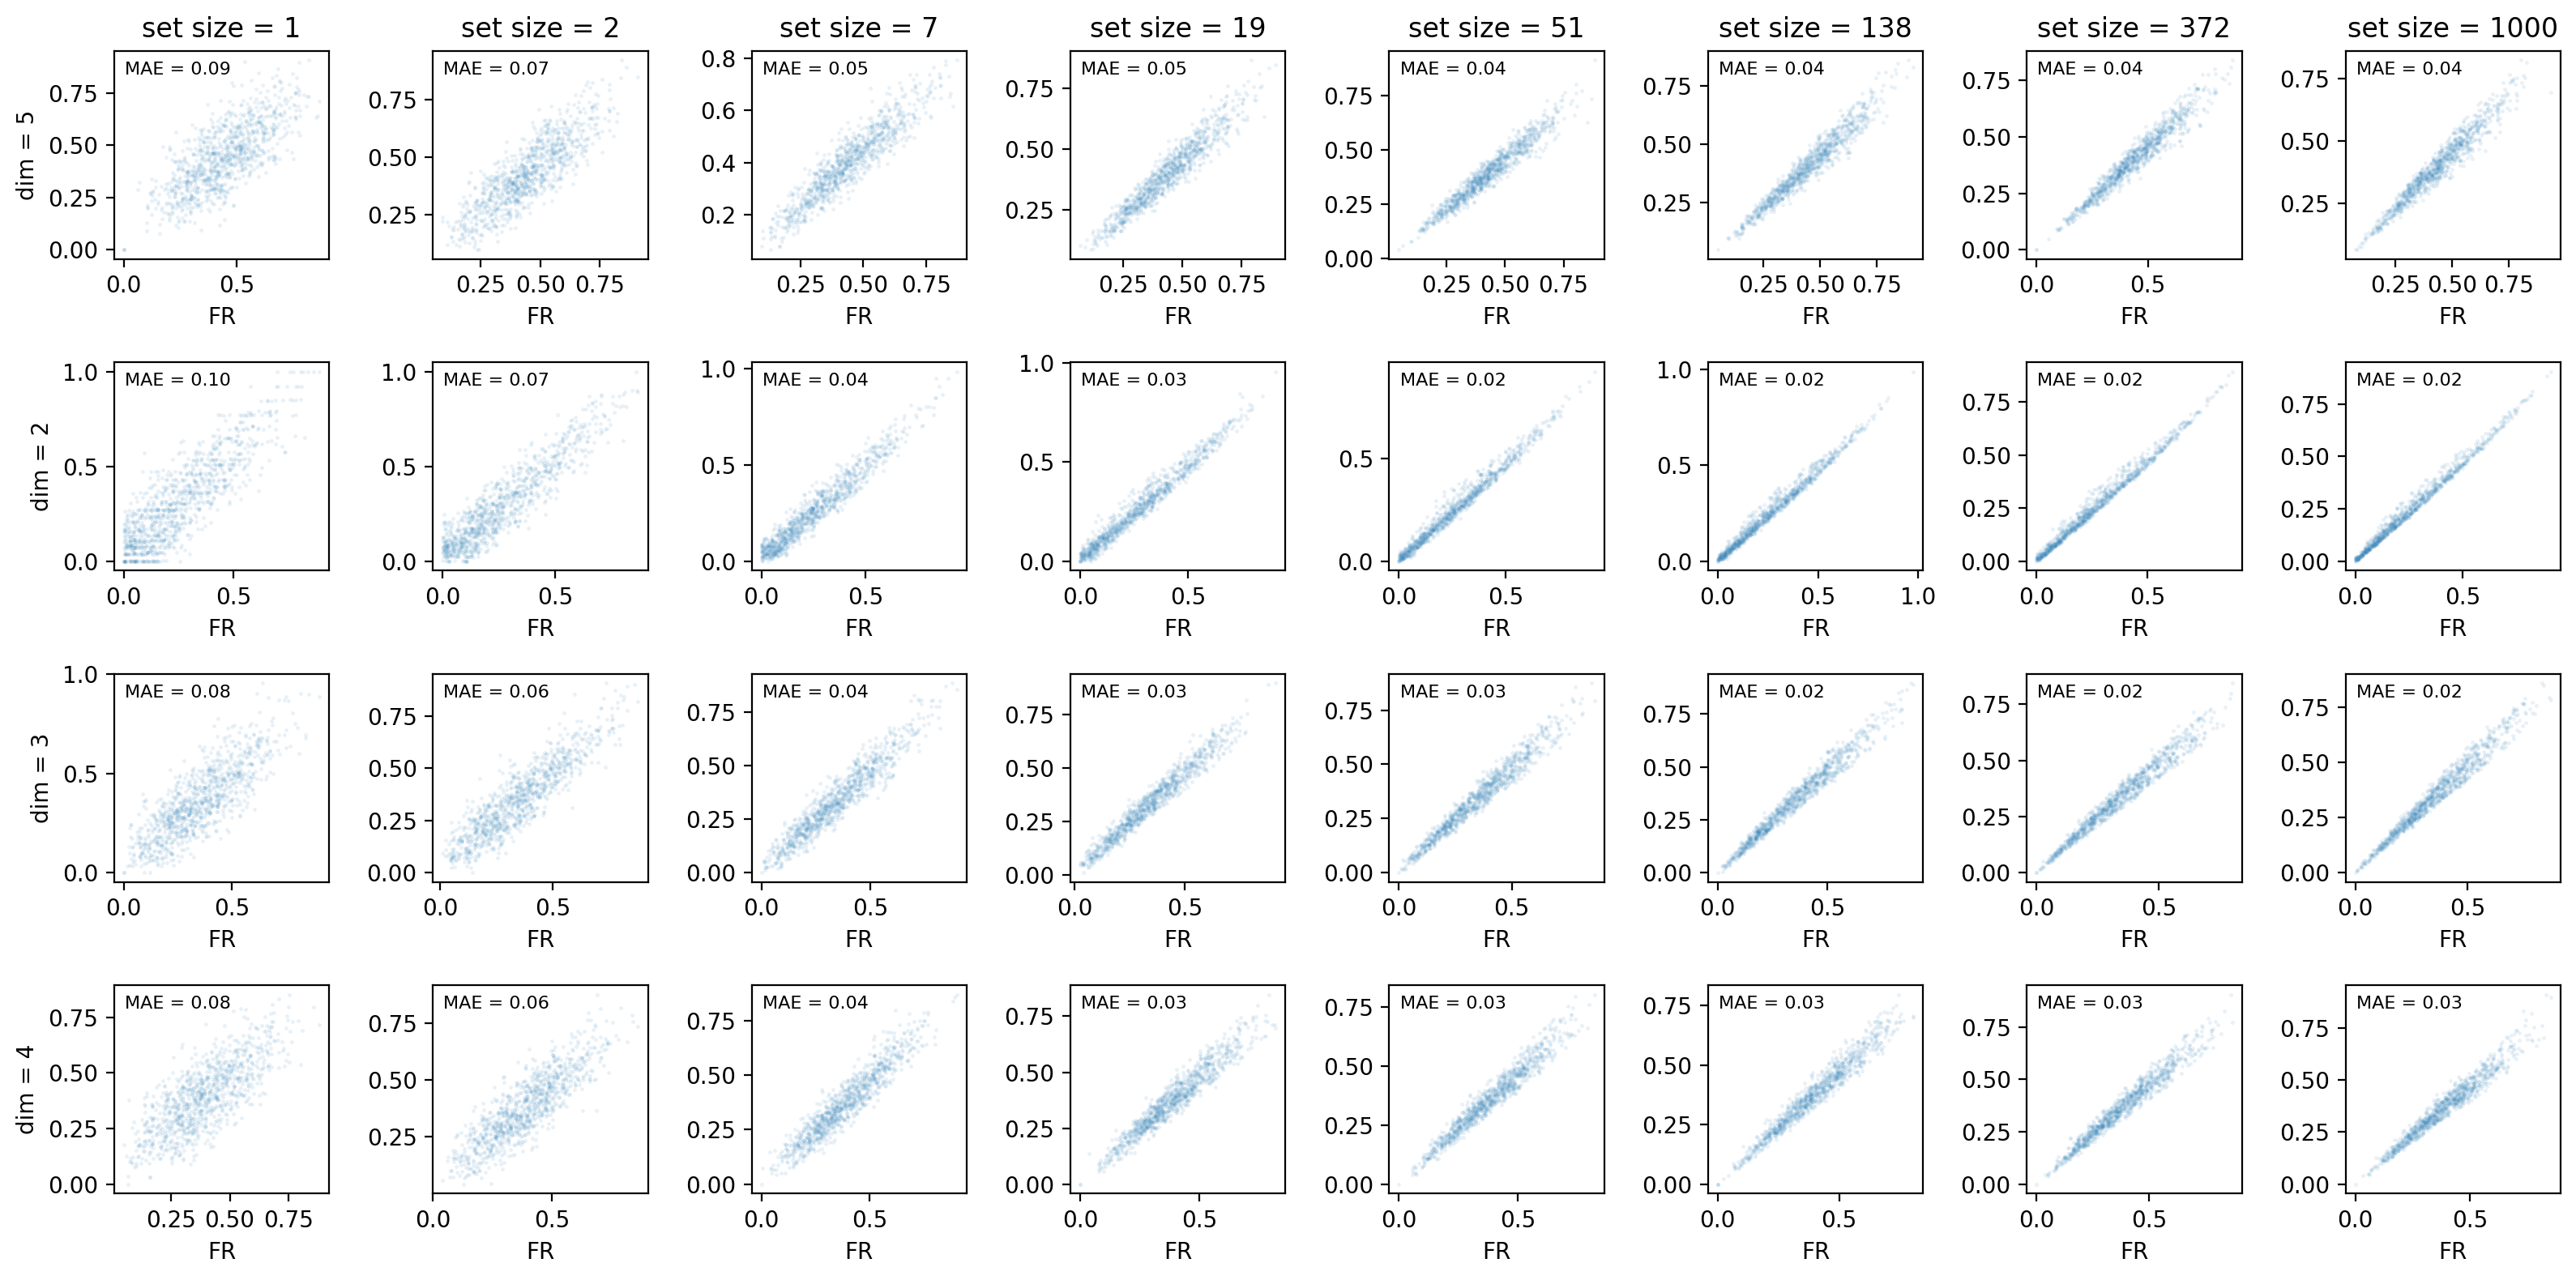

,dim,set_size,MAE
0,5,1,0.089429
1,2,1,0.098126
2,3,1,0.083119
3,4,1,0.082494
4,5,2,0.069176


In [70]:
n_points = 1000
set_sizes = np.logspace(0, 3, 8, dtype=int)

configs = get_all_experiments_info('outputs/', False)
cfgs = [c for c in configs if 'multinomial' in c['name'] and 'spike' not in c['name']]
dims = [c['config']['dataset']['data_shape'][0] for c in cfgs]

n_rows, n_cols = len(cfgs), len(set_sizes)
figsize = (n_cols * 2, n_rows * 2)
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=200)

results = []

for r, set_size in enumerate(set_sizes):
    for c, cfg in enumerate(cfgs):
        ax = axs[c, r]
        fr, dists = run_distance_eval(cfg, n_points, set_size)

        fr_flat = np.nan_to_num(fr.cpu().flatten())
        d_flat = dists.cpu().flatten().numpy()

        # normalize to [0, 1]
        fr_norm = (fr_flat - fr_flat.min()) / (fr_flat.max() - fr_flat.min())
        d_norm = (d_flat - d_flat.min()) / (d_flat.max() - d_flat.min())

        df = pd.DataFrame({"FR": fr_norm, "L2": d_norm}).sample(frac=.001)

        # compute mae
        mae = np.mean(np.abs(fr_norm - d_norm))
        ax.text(0.05, 0.95, f"MAE = {mae:.2f}", transform=ax.transAxes,
                ha='left', va='top', fontsize=8)

        # scatter plot
        sns.scatterplot(data=df, x='FR', y='L2', alpha=0.1, s=3, ax=ax)

        # column labels
        if c == 0:
            ax.set_title(f"set size = {set_size}")

        # row labels
        if r == 0:
            ax.set_ylabel(f"dim = {dims[c]}")
        else:
            ax.set_ylabel("")

        # record result
        results.append({
            'dim': dims[c],
            'set_size': set_size,
            'MAE': mae})
        
plt.tight_layout()
plt.show()

r_df = pd.DataFrame(results)
r_df.head()

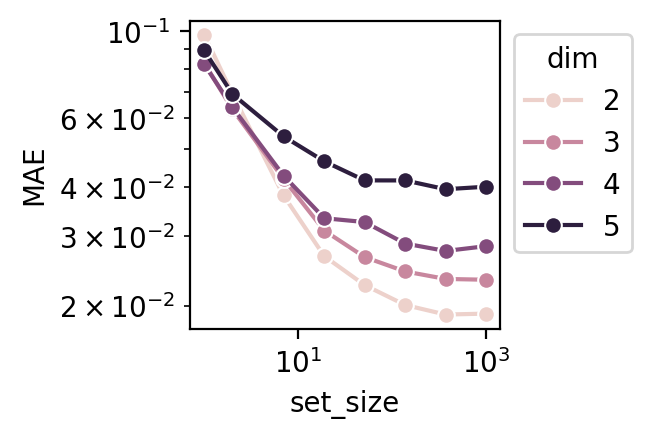

In [72]:
plt.figure(figsize=(2, 2), dpi=200)
g = sns.lineplot(r_df, x='set_size', y='MAE', hue='dim', marker='o')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.xscale('log')
plt.yscale('log')